# Lecture 7: Discrete Random Variables and Distributions 
***

In this notebook we'll get some more practice with discrete random variables and see how we can play with binomial distributions using Python.   

We'll need Numpy and Matplotlib for this notebook, so let's load them.  We'll also need SciPy's binom function for computing binomial coefficients.  

In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt 
from scipy.special import binom
%matplotlib inline

### Exercise 1 - Loaded Dice 
*** 

Consider a loaded six-sided die.  

**Part A**: Suppose that the die is loaded such that you are twice as likely to roll either a $1$, $2$, or $3$, than you are to roll either a $4$, $5$, or $6$. Let $X$ be a random variable describing the die.  What is the probability mass function for $X$? 

lets say 1, 2, 3, each have 2 parts in prob
4, 5, 6 each have 1 part in prob

total is 9/9

while x is b/w 1 and 3, pmf gives 2/9
for the other 3, it gives 1/9

**Part B**: Find the cumulative distribution function for $X$.  What is the probability that you roll a $4$ or lower with the loaded die? 

cdf here would just sum the last, so would be:
    
2/9, 4/9, 6/9, 7/9, 8/9, 9/9

prob of rolling 4 or lower is 7/9, from cdf

### Exercise 2 - Implementing and Sampling the Binomial Distribution 
***

**Part A**: Write a function that takes in the parameters of the binomial distribution, $n$ and $p$, and returns the probability mass function as a Numpy array. In order to get the coefficient in the binomial distribution, you'll need a way to compute ${n \choose k}$.  You can do this from scratch using Python's factorial function, or you can get the value directly using Scipy's canned function [binom](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.binom.html).  

In [48]:
def binomial_pmf(n, p):
    pmf = np.zeros(n + 1)
    
    for k in range(0, n + 1):
        not_p_k = (1 - p) ** (n - k)
        p_k = p ** k
        n_c_k = binom(n, k)
        
        pmf[k] = not_p_k * p_k * n_c_k
    
    return pmf

In [49]:
def print_dist(pmf):
    print(" k | p(k)")
    print("-----------")
    for k, prob in enumerate(pmf):
        print("{:2d} | {:.4f}".format(k, prob))

In [50]:
print_dist(binomial_pmf(10, 0.5))

 k | p(k)
-----------
 0 | 0.0010
 1 | 0.0098
 2 | 0.0439
 3 | 0.1172
 4 | 0.2051
 5 | 0.2461
 6 | 0.2051
 7 | 0.1172
 8 | 0.0439
 9 | 0.0098
10 | 0.0010


**Part B**: So now you know the exact distribution of a binomial random variable, but very frequently we'll want to generate samples from that distribution.  You can do that with Numpy's [binomial](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.binomial.html) function. Read the documentation, and then try drawing 20 samples from _Bin(n,p)_ for $n=10$ and $p=0.25$.  

In [51]:
np.random.binomial(n=10, p=0.5, size=10)

array([6, 5, 7, 5, 4, 4, 7, 5, 6, 5])

**Part C**: We can approximate the pmf of _Bin(n,p)_ by drawing many many samples from the distribution and plotting a **density** histogram.  Do this now.  Additionally, use the function you wrote in **Part A** to get the exact density, and plot the distribution directly below the histogram of your sampled distribution.  How do they compare?  What happens if you use more or fewer samples in the histogram? 

In [52]:
def sampling_vs_pmf(n, p, sample_size):    

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,10))

    # Plot histogram of samples 
    df = pd.DataFrame(np.random.binomial(n, p, sample_size))
    df.hist(ax=axes[0], bins=[ii-.5 for ii in range(11+1)], rwidth=0.8, density=True, color="steelblue")
    axes[0].set_ylabel('Density', fontsize=16)
    axes[0].set_xlabel(r'$X$', fontsize=16)
    axes[0].set_ylim([0,0.40])
    axes[0].set_title("Density Histogram of Bin(10,0.25) Samples", fontsize=16)
    axes[0].grid(alpha=0.25)
    axes[0].set_axisbelow(True)
    axes[0].set_xticks(list(range(0,11)))

    # Plot the exact pmf of the binomial distribution 
    X = np.array(range(0,10+1))
    pmf = binomial_pmf(10, .25)
    axes[1].bar(X, pmf, color="steelblue")
    axes[1].set_ylim([0,0.40])
    axes[1].set_ylabel('PMF', fontsize=16)
    axes[1].set_xlabel(r'$X$', fontsize=16)
    axes[1].set_title("Probability Mass Function for Bin(10,0.25)", fontsize=16)
    axes[1].grid(alpha=0.25)
    axes[1].set_axisbelow(True)
    axes[1].set_xticks(list(range(0,11)));

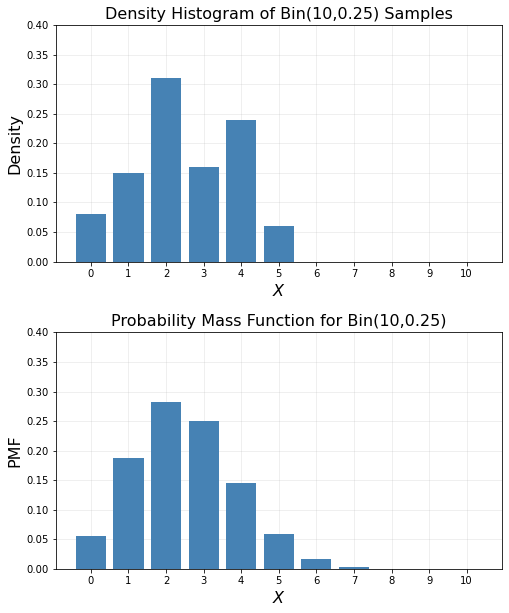

In [53]:
sampling_vs_pmf(10, 0.25, 100)

### Exercise 3 - Predicting Play-off Winners 
***

In this exercise we'll look at the probability of your favorite sports team winning a best-of-7 play-off series. Suppose your team is the slight favorite in the series and in each individual game has a probability of winning of $p = 0.55$. 

**Part A**: What is the probability that your team wins the series? 

**Part B**: How often will a 45%-to-55% underdog win a best-of-7 series?  Is an underdog more likely to win a series if it's shorter, say best-of-5 or best-of-3? 

This example is not particularly realistic because it does not consider home-field advantage.  Typically teams will play better (and thus have a higher probability of winning) when they play at their home field.  Suppose that your team hosts Games 1, 2, 6, and 7 at home, and plays away in Games 3, 4, and 5.  Suppose that when your team plays at home, they win with probability $p = 0.6$ and when they're on the road they win with only probability $q=0.5$.  

**Part C**: Is the probability that your team wins $k$ of the $n$ games still well-described by a binomial distribution?  Why or why not? 

**Part D**: What is the probability that your team wins the 7-game series under the above conditions? 

**Part E**: Now suppose that the teams are evenly matched in the sense that your team wins with probability $p=0.55$ when playing at home and wins with only probability $q = (1-p) = 0.45$ when playing away.  How much of a difference does home-field advantage make? 